# Multi Layer Perceptron


In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import tensorflow as tf

In [11]:
Xg = np.arange(-5, 5, 0.4)
Yg = np.arange(-5, 5, 0.4)
Xg, Yg = np.meshgrid(Xg, Yg)
Zg = (Xg**2 - Yg**2)

In [12]:
x_train=np.zeros([625,2],dtype=np.float64)
y_train=np.zeros([625,1],dtype=np.float64)

In [13]:
x_train[:,0]=np.reshape(Xg,(625)) 
x_train[:,1]=np.reshape(Yg,(625)) 
y_train[:,0]=np.reshape(Zg,(625))
n_samples=625 

In [14]:
X = tf.placeholder(tf.float32,(n_samples,2), name='X')
Y = tf.placeholder(tf.float32,(n_samples,1), name='Y')

Wco = tf.Variable(tf.random_uniform((2,20),-1,1))
bco = tf.Variable(tf.random_uniform((20,),-1,1))

Wcs = tf.Variable(tf.random_uniform((20,1),-1,1))
bcs = tf.Variable(tf.random_uniform((1,),-1,1))

OutputCo= tf.tanh(tf.matmul(X,Wco)+bco)
Output= (tf.matmul(OutputCo,Wcs)+bcs)


In [15]:
# Loss function MSE
loss = tf.reduce_mean(tf.square(Y-Output))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)

train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [16]:
sess = tf.Session()
sess.run(init) 

for i in range(1000):
  sess.run(train, {X: x_train, Y: y_train})

curr_Wco, curr_bco, curr_Wcs, curr_bcs,curr_loss, curr_Output = sess.run([Wco, bco,Wcs, bcs, loss,Output], {X:  x_train, Y: y_train})
#print("Wco: %s bco: %s Wcs: %s bcs: %s loss: %s "%(curr_Wco, curr_bco, curr_Wcs, curr_bcs,curr_loss))
print("loss:\n %s "%(curr_loss))

loss:
 2.1431453 


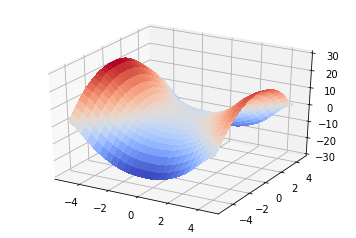

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')

#Matrix Conversation
Zg = np.reshape(curr_Output,(25,25))
surf = ax.plot_surface(Xg, Yg, Zg, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-30, 30)
plt.show()

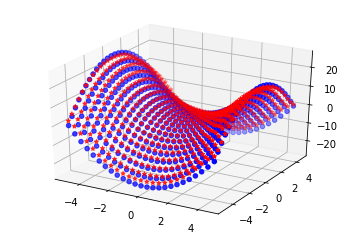

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Xgv=x_train[:,0]
Ygv=x_train[:,1]
ax.scatter(Xgv,Ygv,curr_Output,color='red',marker='*')
ax.scatter(Xgv,Ygv,y_train[:,0],color='blue',marker='o')

plt.show()